In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori #Function for the apriori algorithm
from mlxtend.frequent_patterns import association_rules #Function for finding association rules

In [2]:
# Converting Date in dataset to just year and month
transac = pd.read_csv("./data/DACC_Hackathon_TransactionData.csv")
transac['Panel ID'] = transac['Panel ID'].astype(int)
transac['Date'] = transac['Date'].str[:7]

In [3]:
transac.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend
0,101011101,2018-04,SUGAR,2.0,2.0,5.9
1,101011101,2018-04,COCONUT MILK,3.0,0.6,9.6
2,101011101,2018-05,CAKE,1.0,0.2,5.0
3,101011101,2018-05,CAKE,1.0,0.5,5.0
4,101011101,2018-05,SEASONING POWDER,2.0,0.1,4.2


In [4]:
# finding volume of each food item purchased per month
test = transac.groupby(["Category", "Date"])['Volume'].sum().unstack()
category_date = pd.DataFrame(test).transpose()

In [5]:
category_date.head()

Category,BEER,BELACAN,BIRD NEST,BISCUITS,BOUILON,BUTTER,CAKE,CANNED PRODUCT,CEREAL BEVERAGE,CEREALS,...,SNACK,SOY MILK,SPAGETTI,SPIRITS,SUGAR,TEA,TONIC FOOD DRINK,WINE,YOGHURT DRINK,YOGHURTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-04,48.0,0.8,3.5,365.2,19.1,21.0,20.1,123.2,67.0,28.0,...,96.0,99.4,26.4,1.8,1083.2,27.8,366.3,1.4,44.2,32.5
2018-05,96.3,4.8,4.8,1053.8,67.2,176.4,101.9,525.3,297.1,113.8,...,339.2,513.0,129.6,3.2,3766.3,101.7,1214.5,11.3,204.6,104.7
2018-06,127.8,6.1,1.4,794.1,73.0,226.7,87.6,505.1,236.7,122.8,...,386.5,580.5,151.2,2.9,4315.5,98.7,1065.4,2.5,206.9,89.9
2018-07,202.3,7.0,1.6,1328.4,88.1,86.3,109.9,513.3,330.4,106.8,...,407.5,417.5,191.6,4.7,4535.6,138.6,1579.3,9.6,240.6,120.6
2018-08,187.0,4.9,2.7,1094.1,75.4,60.7,92.6,399.9,239.7,80.1,...,381.2,302.3,109.1,3.8,3669.0,100.4,1157.8,13.3,190.2,89.0


In [6]:
# finding percentage contribution of each food item to the total volume purchased that month
cat_date_percent = category_date.div(category_date.sum(axis=1), axis=0)
cat_date_percent.head()

Category,BEER,BELACAN,BIRD NEST,BISCUITS,BOUILON,BUTTER,CAKE,CANNED PRODUCT,CEREAL BEVERAGE,CEREALS,...,SNACK,SOY MILK,SPAGETTI,SPIRITS,SUGAR,TEA,TONIC FOOD DRINK,WINE,YOGHURT DRINK,YOGHURTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-04,0.001620,0.000027,0.000118,0.012329,0.000645,0.000709,0.000679,0.004159,0.002262,0.000945,...,0.003241,0.003356,0.000891,0.000061,0.036568,0.000939,0.012366,0.000047,0.001492,0.001097
2018-05,0.000878,0.000044,0.000044,0.009613,0.000613,0.001609,0.000930,0.004792,0.002710,0.001038,...,0.003094,0.004680,0.001182,0.000029,0.034357,0.000928,0.011079,0.000103,0.001866,0.000955
2018-06,0.001144,0.000055,0.000013,0.007111,0.000654,0.002030,0.000784,0.004523,0.002120,0.001100,...,0.003461,0.005199,0.001354,0.000026,0.038647,0.000884,0.009541,0.000022,0.001853,0.000805
2018-07,0.001474,0.000051,0.000012,0.009676,0.000642,0.000629,0.000800,0.003739,0.002407,0.000778,...,0.002968,0.003041,0.001396,0.000034,0.033037,0.001010,0.011503,0.000070,0.001752,0.000878
2018-08,0.001701,0.000045,0.000025,0.009952,0.000686,0.000552,0.000842,0.003638,0.002180,0.000729,...,0.003467,0.002750,0.000992,0.000035,0.033374,0.000913,0.010532,0.000121,0.001730,0.000810


<AxesSubplot:title={'center':'Percent Contribution to Monthly Volume'}, xlabel='Date'>

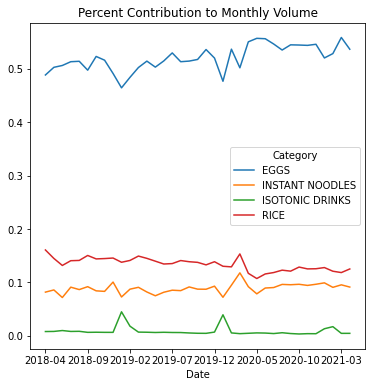

In [7]:
#finding items where the difference between maximum percentage volume and minimum percentage volume is > 3%
big_range = pd.DataFrame(cat_date_percent.max() - cat_date_percent.min() > 0.03, columns = ["A"])
test = big_range[big_range["A"] == True].index
cat_date_percent[test].plot(title = 'Percent Contribution to Monthly Volume', figsize = (6,6))

In [8]:
# making plots for visualization for each highlighted food item

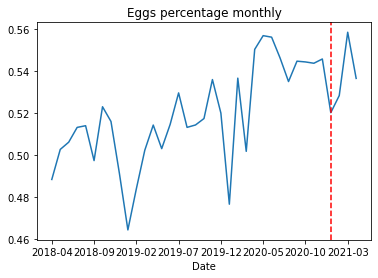

In [9]:
cat_date_percent["EGGS"].plot(kind="line", title="Eggs percentage monthly")
plt.axvline(33, color="red", linestyle="--")

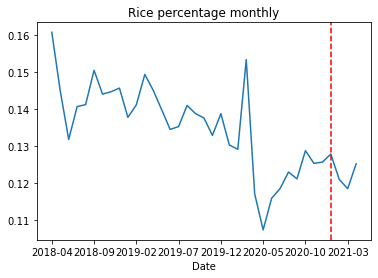

In [10]:
cat_date_percent["RICE"].plot(kind="line", title="Rice percentage monthly")
plt.axvline(33, color="red", linestyle="--")

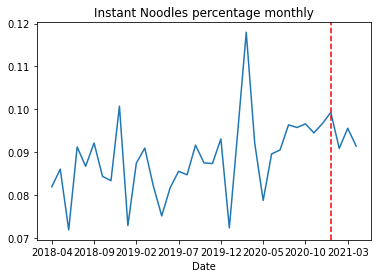

In [11]:
cat_date_percent["INSTANT NOODLES"].plot(kind="line", title="Instant Noodles percentage monthly")
plt.axvline(33, color="red", linestyle="--")

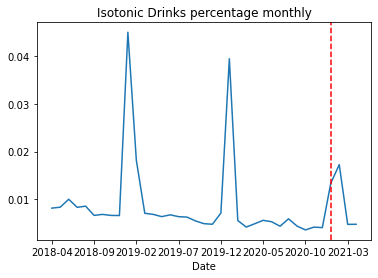

In [12]:
cat_date_percent["ISOTONIC DRINKS"].plot(kind="line", title="Isotonic Drinks percentage monthly")
plt.axvline(33, color="red", linestyle="--")